In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

  0%|          | 0/10 [00:00<?, ?it/s]/home/mehdi/anaconda3/envs/ada/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
 10%|█         | 1/10 [00:00<00:03,  2.64it/s]/home/mehdi/anaconda3/envs/ada/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mehdi/anaconda3/envs/ada/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future v

[3000.0]
[3000.0, 10000.0]
[3000.0, 10000.0, 9000.0]
[3000.0, 10000.0, 9000.0, 2000.0]
[3000.0, 10000.0, 9000.0, 2000.0, 6000.0]
[3000.0, 10000.0, 9000.0, 2000.0, 6000.0, 5000.0]
[3000.0, 10000.0, 9000.0, 2000.0, 6000.0, 5000.0, 7000.0]
[3000.0, 10000.0, 9000.0, 2000.0, 6000.0, 5000.0, 7000.0, 4000.0]
[3000.0, 10000.0, 9000.0, 2000.0, 6000.0, 5000.0, 7000.0, 4000.0, 1000.0]
[3000.0, 10000.0, 9000.0, 2000.0, 6000.0, 5000.0, 7000.0, 4000.0, 1000.0, 8000.0]
[0.0007560577810101012, 0.000209095172860202, 0.0002386070213006055, 0.0009068545516165657, 0.00042479739723747466, 0.0004434405864536356, 0.00022184015212232331, 0.0005310257406602019, 0.0021234929864924236, 0.00023033474403272723]


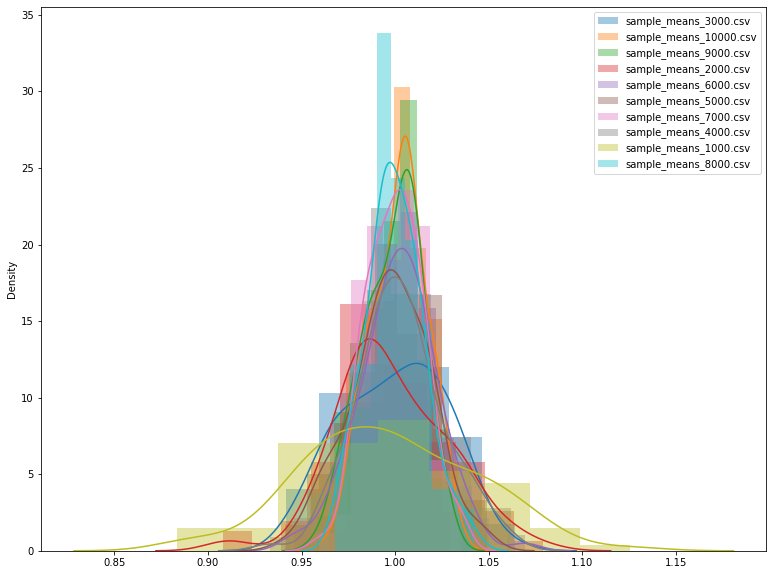

(0.0, 0.003)

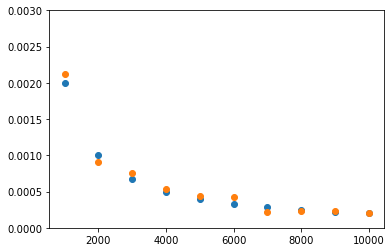

In [4]:
directory = "tr"
fig = plt.subplots(nrows = 1, ncols = 1, sharex = False, sharey = False, figsize = (13, 10))
var1=[]
var2=[]
l=[]
for root,dirs,files in os.walk(directory):
    for file in tqdm(files):
        if file.endswith(".csv"):
            file_path = os.path.join(directory,file)
            df= pd.read_csv(file_path)
            
            sns.distplot(df.iloc[1:,:],label=file)
            
            l.append((float)(file.split("_")[-1].split(".")[0]))
            var1.append(df.iloc[0,0]/(float)(file.split("_")[-1].split(".")[0]))
            var2.append(df.iloc[1:,0].var())
            print(l)
print(var2)
plt.legend()
plt.show()
plt.scatter(l,var1)
plt.scatter(l,var2)
plt.ylim(0,0.003)

In [5]:
df=pd.read_csv("moments.csv",header=None)
df_separated=df.iloc[1:,0].str.split(pat=";",expand=True).astype(float)
df_separated.columns= df.iloc[0,0].split(";")
#df_separated['Statistical Moment']=df.iloc[:,0].str.split(pat=";",expand=True)[1].astype(float)

sns.barplot(x=df_separated['Order'], y =df_separated['Statistical Moment'])


FileNotFoundError: [Errno 2] No such file or directory: 'moments.csv'

In [88]:
df_separated

,Order,Statistical Moment
1,0.0,1.000000
2,1.0,-0.052216
3,2.0,1.987609
4,3.0,-0.443077
5,4.0,12.708220
6,5.0,-5.834233
7,6.0,136.979800
8,7.0,-82.283720
9,8.0,1959.829000
10,9.0,-1201.986000
